# <u>AFRIC 2</u>: Introduction to GeoAI

<img src="https://www.microsoft.com/en-us/research/uploads/prod/2022/01/Geospatial_Norway_header_01-2022_1920x720.jpg" width="100%" />

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/geospatial_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authors:** [Akram Zaytar](https://www.linkedin.com/in/akramz/), [Gilles Q. Hacheme](https://www.linkedin.com/in/gilles-q-hacheme-a0956ab7/), [Aisha Alaagib](https://www.linkedin.com/in/aishaalaagib/), [Girmaw A. Tadesse](https://www.linkedin.com/in/girmaw-abebe-tadesse/).

**Introduction:**

In this notebook, we will introduce the field of geospatial machine learning by first going over the geospatial data primitives then solving a machine learning problem in an "end-to-end" fashion.

We aim to cover the following:
1. **Introduction to geospatial data**: vector and raster data primitives.
2. **Problem framing**: introducing the problem that we are going to solve.
3. **Approach 1**: Tabular Learning with `LightGBM`.
    - **Data** acquisition and preprocessing: we will get the data and preprocess it for machine learning.
    - **Model fitting**: we will fit a model to the data and conduct hyperparameter search.
    - **Model evaluation**: we will evaluate the model on the test data.
    - **Inference**: we will predict the output for the test data.
4. **Approach 2**: Deep Learning with a `Sequence-to-One` model.

**Topics:**

Content: <font color='blue'>`Geospatial Data Analysis`</font>, <font color='blue'>`Computer Vision`</font>, <font color='blue'>`Tabular Data`</font>.

Level: <font color='grey'>`Beginner`</font>, <font color='grey'>`Intermediate`</font>

**Aims/Learning Objectives:**

- Learn the basics of Geospatial: differentiating between the primary data types, such as vector and raster primitives. This knowledge will form the foundation for any geospatial analysis or modeling task.
- Comprehensive Knowledge on Geospatial Machine Learning Workflow: learn how to frame a geospatial problem, acquire and preprocess relevant data, and fit a model.
- Diversity in Modeling Approaches: By studying two distinct approaches - tabular learning with LightGBM and deep learning using a Sequence-to-One model you will appreciate the versatility of tools and techniques available in the geospatial machine learning domain, allowing to select the best approach for different types of problems.

**Before you start:**

For this practical, you will need to use a GPU to speed up training. To do this, go to the "Runtime" menu in Colab, select "Change runtime type" and then in the popup menu, choose "GPU" in the "Hardware accelerator" box.

**Prerequisites:**

Basic Machine Learning Concepts, Python Programming, Familiarity with Deep Learning, Hands-on Experience with Data Preprocessing.

**Outline:**

>[Unlocking Earth's Secrets: Intro to Geospatial Data & Machine Learning](#scrollTo=TV85F3PEufpF)

>[Introduction to Geospatial Data](#scrollTo=5BBTx5ZwufpG)

>>[Vector](#scrollTo=qub5T5y1ufpG)

>>>[Basic Geometric Types](#scrollTo=xbrSesehufpG)

>>>[Properties of Geometric Objects](#scrollTo=yE2Oz2FcufpI)

>>[Raster](#scrollTo=LuQJNMJBufpJ)

>[Crop Type Classification in Africa](#scrollTo=dvmQ-cJkufpJ)

>>[Problem Scoping](#scrollTo=JYjJJkhLwOcT)

>>>>[What type of machine learning problem is this?](#scrollTo=2qiNV7IhufpJ)

>>>>[What inputs are we going to use?](#scrollTo=2zL1_uf5ufpJ)

>>>>[What are we predicting?](#scrollTo=zE_EsHzzufpQ)

>>>>[How will we validate the model?](#scrollTo=CGHmhNpnufpQ)

>>>>[How will we measure performance?](#scrollTo=Lj_AF5bRufpQ)

>>>>[Prediction](#scrollTo=Lj_AF5bRufpQ)

>>>>[Target](#scrollTo=Lj_AF5bRufpQ)

>>[Model 1: Tabular ML with LightGBM](#scrollTo=ejnyPSPMufpR)

>>>[Data Preparation](#scrollTo=ejnyPSPMufpR)

>>[Modeling](#scrollTo=KPILtkZvufpS)

>>>[Frequency baseline](#scrollTo=1vob3uXJufpS)

>>>[LightGBM](#scrollTo=tR3w5tP9ufpS)

>>[Evaluation](#scrollTo=tiJVkLcVufpT)

>>>[Investigating Class-Imbalances](#scrollTo=2XvrrCrEwOcW)

>>>[XAI](#scrollTo=hKHoWqIkwOcX)

>>[Inference](#scrollTo=4DJV_Hq0ufpT)

>[Deep Learning](#scrollTo=A5w0WByCUpdb)

>>[Data Preprocessing](#scrollTo=t60qAoCEbtm_)

>>[Class Implementations](#scrollTo=xebQiqiVErI2)

>>[Dataset](#scrollTo=28IXH4N4Updb)

>>>[Key Methods](#scrollTo=28IXH4N4Updb)

>>>[Why is this useful?](#scrollTo=28IXH4N4Updb)

>>[Data Module](#scrollTo=Qs81pjALUpdb)

>>>[Why is this helpful?](#scrollTo=Qs81pjALUpdb)

>>[Model Architecture](#scrollTo=HXsq_Z_GUpdb)

>>>[Main Components](#scrollTo=HXsq_Z_GUpdb)

>>[Data Augmentation](#scrollTo=GuAZRsAgUpdb)

>>>[Key Components](#scrollTo=GuAZRsAgUpdb)

>>[Task](#scrollTo=oxsn6z15Amf7)

>[Conclusion](#scrollTo=b2qvh17OwOcY)

>[Resources](#scrollTo=Y1MbhybTwOcY)

>>>[Tutorials](#scrollTo=Y1MbhybTwOcY)

>>>[Geospatial Libraries](#scrollTo=Y1MbhybTwOcY)

>>>[Credits](#scrollTo=Y1MbhybTwOcY)

**Suggested experience level in this topic:**

| Level         | Experience                            |
| --- | --- |
`Beginner`      | It is my first time being introduced to this work. |
`Intermediate`  | I have done some basic courses/intros on this topic. |

In [1]:
# @title **Paths to follow:** What is your level of experience in the topics presented in this notebook? (Run Cell)
experience = "advanced" #@param ["beginner", "intermediate", "advanced"]

sections_to_follow=""

if experience == "beginner":
  sections_to_follow="1. Introduction to Geospatial Data -> 2.1. Problem Scoping -> 2.2. Tabular ML with LightGBM -> Conclusion -> Feedback"
elif experience == "intermediate":
  sections_to_follow="1. Introduction to Geospatial Data -> 2.1. Problem Scoping -> 2.2. Tabular ML with LightGBM -> 2.3. Deep Learning -> Conclusion -> Feedback"
else:
  sections_to_follow="1. Introduction to Geospatial Data -> 2.1. Problem Scoping -> 2.2. Tabular ML with LightGBM -> 2.3. Deep Learning -> Conclusion -> Feedback"

print(f"Based on your experience, it is advised you follow these -- {sections_to_follow} sections. Note this is just a guideline.")

Based on your experience, it is advised you follow these -- 1. Introduction to Geospatial Data -> 2.1. Problem Scoping -> 2.2. Tabular ML with LightGBM -> 2.3. Deep Learning -> Conclusion -> Feedback sections. Note this is just a guideline.


## Installation and Imports

In [2]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

# %pip install rioxarray -q
# %pip install shap -q
# %pip install contextily -q
# %pip install torchgeo -q
# %pip install feather-format -q

from IPython.core.debugger import set_trace
from collections import Counter
from pathlib import Path
import requests
import zipfile
import shutil
import os
import re
from bs4 import BeautifulSoup

import random
import argparse
from functools import partial
from pathlib import Path
from random import shuffle
from typing import Callable, Optional, List, Dict, Any

import joblib
import kornia.augmentation as K
import matplotlib.pyplot as plt
import numpy as np
import timm
import torch
import torch.nn as nn
from sklearn.preprocessing import label_binarize
from lightning import LightningDataModule, LightningModule
from lightning.pytorch import seed_everything, Trainer
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from lightning.pytorch.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset, DataLoader

/Users/akramz/miniforge3/envs/geoai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#@hidden_cell# Set the URLs of the files
# @title Next, we need to download the necessary files to be used in this practical:. (Run Cell)
crop_url = "https://drive.google.com/uc?export=download&id=1w1pvR0ESImXhgoCdy3QO6dV03vXbmvHH"
bikes_url = "https://drive.google.com/uc?export=download&id=161vAJpEnau9pXuJEi0omDmNu38cudJq1"
paris_districts_url = "https://drive.google.com/uc?export=download&id=1XyM6U-rO963zRDmtHAUx918De3qmMqzz"
countries_url  = "https://drive.google.com/uc?export=download&id=1og3s27XvrKaHAJ59NP13mCn4CKZfZPJu"

# def download_file_from_google_drive(url, directory, file_name):
#     # Extract file_id from the URL
#     file_id = re.search('id=([a-zA-Z0-9_-]+)', url).group(1)

#     # Google Drive URL
#     base_url = "https://drive.google.com/uc?export=download"

#     session = requests.Session()
#     response = session.get(base_url, params={'id': file_id}, stream=True)

#     # Check the content type
#     content_type = response.headers.get('Content-Type')

#     # If it's an HTML page, it might be a confirmation page
#     if 'text/html' in content_type:
#         confirm_token_match = re.search('confirm=([0-9A-Za-z_]+)', response.text)
#         if confirm_token_match:
#             confirm_token = confirm_token_match.group(1)
#             response = session.get(base_url, params={'id': file_id, 'confirm': confirm_token}, stream=True)

#     # Save the content to the destination
#     save_response_content(response, os.path.join(directory, file_name))

# def save_response_content(response, destination):
#     CHUNK_SIZE = 32768

#     with open(destination, "wb") as f:
#         for chunk in response.iter_content(CHUNK_SIZE):
#             if chunk:
#                 f.write(chunk)

def download_file_from_google_drive(url, directory, file_name):
    file_id = re.search('id=([a-zA-Z0-9_-]+)', url).group(1)
    base_url = "https://drive.google.com/uc?export=download"

    session = requests.Session()
    response = session.get(base_url, params={'id': file_id}, stream=True)

    content_type = response.headers.get('Content-Type')

    if 'text/html' in content_type:
        soup = BeautifulSoup(response.text, 'html.parser')
        form = soup.find('form', {'id': 'download-form'})
        
        if form:
            action = form.get('action')
            params = {}
            for input_tag in form.find_all('input', {'type': 'hidden'}):
                name = input_tag.get('name')
                value = input_tag.get('value')
                if name and value:
                    params[name] = value
            
            response = session.get(action, params=params, stream=True)

    save_response_content(response, os.path.join(directory, file_name))

def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk:
                f.write(chunk)

# Set the path of the directory
data_dir = Path("./files")
if data_dir.exists(): shutil.rmtree(data_dir, ignore_errors=True)
data_dir.mkdir(exist_ok=True)

# Download
download_file_from_google_drive(crop_url, data_dir, "df.feather")
download_file_from_google_drive(bikes_url, data_dir, "paris_bike_stations_mercator.gpkg")
download_file_from_google_drive(paris_districts_url, data_dir, "paris_districts_utm.geojson")
download_file_from_google_drive(countries_url, data_dir, "countries.zip")

---

## Introduction to Geospatial Data

Geospatial data refers to **information that can be associated with geographic locations on Earth**. It comes with spatial attributes such as location and geometry shape.

Examples of geospatial data:
- Population density.
- Weather and climate information.
- Transportation networks.

Typically, geospatial data is represented in two ways:

<div style="text-align:center;"> <figure> <img width="500px" src="https://i0.wp.com/pangeography.com/wp-content/uploads/2022/05/Raster_vector_tikz.png" /> <figcaption style="font-size:small;">Image credit: <a href="https://pangeography.com/geographic-data-structure-vector-data-and-raster-data/">Pan Geography</a></figcaption> </figure> </div>

- **Vector**: points, lines, polygons, etc. Each vector object is a geometry that can have multiple attributes. Such data is typically saved as a vector file (`Shapefile` (.shp) and `GeoJSON`, among many).
- **Raster**: similar to images, it is represented as a grid of cells or pixels, each cell holds a value representing a value or measurement. Raster data is typically stored in formats such as `GeoTIFF` or `NetCDF`.

Next, let's get an overview of **vector** and **raster** data.

### 1.1 Vector <font color='blue'>`Beginner`</font>

- You'd want to use `shapely` to create and manipulate geometry objects in Python.
- `shapely` provides support for gegraphic information systems operations, such as **spatial relationships**, **geometric operations**, and **coordinate transformations**.

... but in most cases, using the higher-level library **geopandas** would be enough.

#### Basic Geometric Types

`shapely` allows us to create basic geometric objects that are commonly used in geospatial analysis. Examples:
- `Point`: Represents a single point in 2-3 D space.
- `LineString`: Represents a sequence of connected points forming a line.
- `Polygon`: Represents a filled area defined by a sequence of points that form a closed ring.

Let's start by creating a `point`:

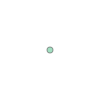

In [4]:
from shapely.geometry import Point

# Create a point
point = Point(1,2)
point

... how about a polygon (enclosed list of coordinates)?

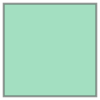

In [5]:
from shapely.geometry import Polygon

points = [(0,0), (0,2), (2,2), (2,0)]
polygon = Polygon(points)
polygon

We can also create multiple geometries:

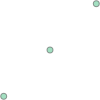

In [6]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, LineString

points = [Point(0, 0), Point(1, 1), Point(2, 2)]
multipoint = MultiPoint(points)
multipoint

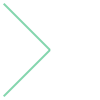

In [7]:
linestrings = [LineString([(0, 0), (1, 1)]), LineString([(1, 1), (0, 2)])]
multiline = MultiLineString(linestrings)
multiline

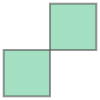

In [8]:
polygons = [Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]), Polygon([(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)])]
multipolygon = MultiPolygon(polygons)
multipolygon

<font color="red"> **Exercise 1:**
Create linestring and polygon using 3 points?

In [ ]:
#@title Exercise 1: Create linestring and polygon using 3 points?
point1 = #update me
point2 = #update me
point3 = #update me

# create line
line = #update me
line_from_tuples = #update me

#create plygon
poly = #update me
poly

In [9]:
# @title Answer to Exercise 1 (Try not to peek until you've given it a good try!')

# Create 3 geometric points
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

# Create a line
line = LineString([point1, point2, point3])
line_from_tuples = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Create a polygon
poly = Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)])

#### Properties of Geometric Objects

After we create geometric objects, we can access attributes that can be useful in pratice. We highlight a few important ones:

- `area`: Returns the area of a `Polygon` or `MultiPolygon` object.
- `bounds`: Returns the bounding box of a geometric object as a tuple `(min_x, min_y, max_x, max_y)`.
- `centroid`: Returns the geometric centroid of a geometric object as a `Point`.

In [10]:
# Area of a Polygon
polygon_area = polygon.area
polygon_area

4.0

In [11]:
# Bounds of a Point
point_bounds = point.bounds
print(f"Point bounds: {point_bounds}")
print(f"Point coordinates: {point.x, point.y}")

Point bounds: (1.0, 2.0, 1.0, 2.0)
Point coordinates: (1.0, 2.0)


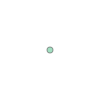

In [12]:
# Centroid of a Polygon
polygon_centroid = polygon.centroid
polygon_centroid

On top of attributes, we have spatial operations and relationships that can take multiple geometries and produce new ones. We highlight the following:
- `union`: Computes the geometric union of two objects.
- `intersection`: Computes the geometric intersection of two objects.
- `difference`: Computes the geometric difference of two objects.
- `contains`: whether one geometric object contains another.
- `intersects`: whether two geometric objects intersect.

polygon1 area: 4.0, polygon2 area: 4.0, polygon_union area: 7.0


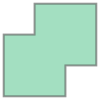

In [13]:
# Create two polygon objects
polygon1 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
polygon2 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])

# Union of two polygons
polygon_union = polygon1.union(polygon2)
print(f"polygon1 area: {polygon1.area}, polygon2 area: {polygon2.area}, polygon_union area: {polygon_union.area}")
polygon_union

<font color="red">**Exercise 2:**
Computes the geometric intersection of two objects.</font> ( Hint: check ploygon_name.intersection / polygon_name.different functions)

In [ ]:
#@title Exercise 2: Computes the geometric intersection of two objects.
# IMplement the Intersection of two polygons
polygon_intersection = # update me
print(f"polygon1 area: {polygon1.area}, polygon2 area: {polygon2.area}, polygon_intersection area: {# update me}")

polygon_intersection

polygon1 area: 4.0, polygon2 area: 4.0, polygon_intersection area: 1.0


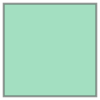

In [14]:
#@title Answer to Exercise 2 (Try not to run until you've given it a good try!')

# Intersection of two polygons
polygon_intersection = polygon1.intersection(polygon2)
print(f"polygon1 area: {polygon1.area}, polygon2 area: {polygon2.area}, polygon_intersection area: {polygon_intersection.area}")
polygon_intersection

In [15]:
#@title Implement The difference
# update me

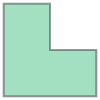

In [16]:
# @title Answer to Exercise 2 "the difference"
polygon1.difference(polygon2)

We can also use predicates to get useful information about geospatial object relations:

In [17]:
# A bunch of points
point1 = Point(0, 0)
point2 = Point(0, 0)
point3 = Point(1, 1)

# One linestring (connected points)
linestring = LineString([(0, 0), (1, 1), (2, 2)])

# Two polygons
polygon1 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
polygon2 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])

# Spatial relationship predicates
print("point1 equals point2:", point1.equals(point2))
print("point1 within polygon1:", point1.within(polygon1))
print("polygon1 intersects polygon2:", polygon1.intersects(polygon2))
print("polygon1 touches polygon2:", polygon1.touches(polygon2))

point1 equals point2: True
point1 within polygon1: False
polygon1 intersects polygon2: True
polygon1 touches polygon2: False


In most cases, however, we'll be using `geopandas` to read vector files and analyze the data:

In [18]:
import geopandas as gpd

# Load the countries dataframe using geopandas
countries = gpd.read_file("./files/countries.zip")

We can use methods like `head()`, `info()`, and `describe()` to inspect and explore GeoDataFrames, similar to how you would use them with Pandas DataFrames:

In [19]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [20]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB


##### Coordinate Reference Systems (CRS)

A Coordinate Reference System (CRS) provides a standardized way of representing locations on the Earth's surface. It is a combination of an Earth model (often a spheroid) and a projection system, which translates the 3D Earth surface onto a 2D plane. Commonly used CRS include `WGS84`, often used for `GPS` data, and `UTM`, a set of projections that divide the world into a series of 6-degree longitudinal zones. When working with geospatial data, it's crucial to ensure that all datasets are in a consistent CRS to avoid errors in location and measurement.

Converting between different CRS is known as "reprojection." Care must be taken during reprojection to maintain data integrity, especially when working with large areas or when precision is crucial. Cooordinate reference systems (CRS) can take you from the geometric coordinates (numbers) to the earth's surface. `GeoPandas` allows us to inspect the CRS and reproject it if necessary:

In [21]:
# Check the CRS
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can use `shapely` attributes and operations to get geometries of interest. Example:

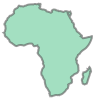

In [24]:
# Plot the union of all african countries
countries[countries["CONTINENT"] == "Africa"].union_all()

### 1.2 Raster <font color='blue'>`Beginner`</font>

To read raster data, we need a library capable of reading geo file formats (e.g. GeoTIFF, NetCDF, etc.) and preserving their metadata.

A library that can do that and is integrated with the Python ecosystem (NumPy, Geopandas, Rasterio, etc.) is `rioxarray`. `rioxarray` supports many critical tasks that we might want to do such as:
- Reading/writing raster files.
- Visualizing the raster data.
- Processing the data with HPC capabilities (`NumPy` + `Dask`).
- Geospatial operations such as...
    - Resampling.
    - Clipping.
    - Reprojecting.

In [25]:
import rioxarray as rxr

# Read the raster Tiff file
url = "https://oin-hotosm-temp.s3.us-east-1.amazonaws.com/683dfa9538c2474f1f53bbd8/0/683dfa9538c2474f1f53bbd9.tif"
ds = rxr.open_rasterio(url)
ds

<xarray.DataArray (band: 3, y: 9920, x: 9418)> Size: 280MB
[280279680 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 75kB -1.011e+07 -1.011e+07 ... -1.011e+07
  * y            (y) float64 79kB 5.239e+06 5.239e+06 ... 5.239e+06 5.239e+06
    spatial_ref  int64 8B 0
Attributes: (12/16)
    TIFFTAG_SOFTWARE:          3Dnovator Engine 1.0.0.0 (9ba0f184)
    TIFFTAG_XRESOLUTION:       0.37053201
    TIFFTAG_YRESOLUTION:       0.37053201
    TIFFTAG_RESOLUTIONUNIT:    3 (pixels/cm)
    acquisitionEndDate:        2025-06-02T18:43:00
    acquisitionStartDate:      2025-06-02T18:13:00
    ...                        ...
    STATISTICS_MEAN:           133.85489414544
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         62.669633467817
    STATISTICS_VALID_PERCENT:  57.58
    scale_factor:              1.0
    add_offset:                0.0

We can see that the data is essentially a multi-dimensional array of values. That has the following components:
- **Dimensions**: `band` (RGB), `y` (latitude), `x` (longitude).
- **Coordinates**: specify the dimension tick values on the multi-dimensional array.
- **Attributes**: that come with the data.

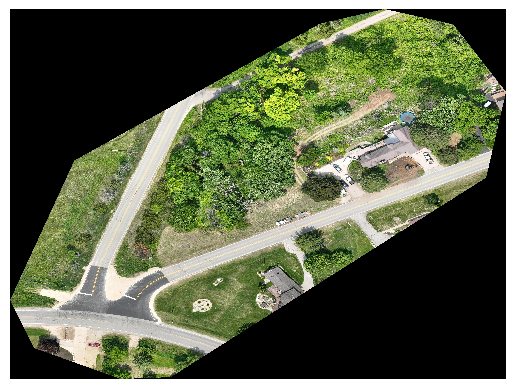

In [26]:
# Visualize the array
_ = ds.plot.imshow()
_ = plt.gca().axis("off")
_ = plt.title("")

After this quick introduction to geospatial data, let's move to learning more about Geospatial ML by trying to solve a problem.

---

## *Crop Type Classification in Africa*

In this project, we will use Geospatial machine leraning to classify farm-level crop types in Kenya using Sentinel-2 satellite imagery.

<div style="text-align:center;">
    <figure>
        <img style="width:50%;" src="https://zindi-public-release.s3.eu-west-2.amazonaws.com/uploads/competition/image/42/header_e7a684a3-b7c0-4f53-81ca-7406f148fc5e.png" />
        <figcaption style="font-size:small;">Question: <b>What is the farmed crop for each field?</b> (Image credit: <a href="https://zindi.africa/">Zindi</a>)</figcaption>
    </figure>
</div>

### 2.1 Problem Scoping <font color='blue'>`Beginner`</font>

Let's answer a few fundamental questions about the problem before we begin:

#### **What type of machine learning problem is this?**

This is a supervised multiclass classification problem.

#### **What inputs are we going to use?**

We will use pixel-level Sentinel-2 satellite imagery as input to our model:

<div style="text-align:center;">
    <figure>
        <img width="750px" src="https://images.ctfassets.net/qfhr9fiom9gi/l1YijPOaC0jOT4pIs4FFq/c308480fc0a7ecef82c6724a4113ed7c/pasted_image_0.png" />
        <figcaption style="font-size:small;">Sentinel-2 Bands (reference <a href="https://www.mdpi.com/2072-4292/8/3/166">paper</a>)</figcaption>
    </figure>
</div>

- The input includes **12 bands of observations from Sentinel-2 L2A**: observations in the ultra-blue, blue, green, red; visible and near-infrared (VNIR); and short wave infrared (SWIR) spectra, as well as a cloud probability layer.
- Each pixel has measurements for **13 dates** that cover the whole farming season.

Details about the bands:
- The twelve bands are `[B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B11, B12]`.
    - B01 (Coastal aerosol)
    - B02 (Blue)
    - B03 (Green)
    - B04 (Red)
    - B05 (Red Edge 1)
    - B06 (Red Edge 2)
    - B07 (Red Edge 3)
    - B08 (NIR - Near Infrared)
    - B8A (Red Edge 4)
    - B09 (Water vapor)
    - B11 (SWIR - Shortwave Infrared 1)
    - B12 (SWIR - Shortwave Infrared 2)
- The cloud probability layer is a product of the Sentinel-2 atmospheric correction algorithm (Sen2Cor) and provides an estimated cloud probability (0-100%) per pixel.

#### **Can you Frame your Approach?**

<div style="text-align:center;">
    <figure>
        <img style="750px;" src="https://i.postimg.cc/DZLB2ytm/Indaba-bd.png" />
        <figcaption style="font-size:small;">Approach Overview.</figcaption>
    </figure>
</div>

#### **What are we predicting?**

We need to **classify each farm** into one of the following categories:

```
Crop ID   Crop Type
   1      Maize
   2      Cassava
   3      Common Bean
   4      Maize & Common Bean (intercropping)
   5      Maize & Cassava (intercropping)
   6      Maize & Soybean (intercropping)
   7      Cassava & Common Bean (intercropping)
```

#### **How will we validate the model?**

We will conduct a random train-validation split by farm IDs.

#### **How will we measure performance?**

The evaluation metric is **cross-entropy**. For each farm `field ID`, we are expected to predict the probability that the farm has a crop of that type. Example:

#### Prediction
```
FieldID     CropId_1  CropId_2  CropId_3  CropId_4  CropId_5  CropId_6  CropId_7
<integer>   <float>   <float>   <float>   <float>   <float>   <float>   <float>
  1184       0.14       0.14      0.14      0.14      0.14      0.14      0.16
```

#### Target
```
FieldID     CropId_1  CropId_2  CropId_3  CropId_4  CropId_5  CropId_6  CropId_7
<integer>   <float>   <float>   <float>   <float>   <float>   <float>   <float>
  1184         0         0         1         0         0         0         0
```

---

Next, we want to prepare the dataset for machine learning.

### 2.2 Model 1: Tabular ML with `LightGBM` <font color='orange'>`Intermediate`</font>

#### Data Preparation

In this section, we want to do the following:

1. Remove the pixels where the cloud probability value is greater than `50%`
2. Split the data into train/validation/test.
3. Verify that no data leakage is present in the train/validation/test data.
4. Check the distribution of each channel or band.
5. Plot the farms by their labels in a map.
6. Visualize a single farm's NDVI as it changes through time (13 dates).

In [27]:
import pandas as pd

df = pd.read_feather(data_dir / "df.feather")
df.head()

band,time,lat,lon,field,crop,B01,B02,B03,B04,B05,B06,B07,B08,B09,B11,B12,B8A,CLD
0,2019-06-06,0.168064,34.042872,2067,0,0.0192,0.0397,0.0722,0.0520,0.1063,0.2664,0.3255,0.3292,0.1973,0.1044,0.3425,0.3312,0.0
1,2019-06-06,0.168064,34.042962,2067,0,0.0192,0.0402,0.0700,0.0468,0.1085,0.3042,0.3770,0.3372,0.2088,0.1107,0.3929,0.3312,0.0
2,2019-06-06,0.168064,34.043411,1020,2,0.0248,0.0286,0.0673,0.0395,0.1144,0.3462,0.4254,0.4288,0.2325,0.1281,0.4477,0.3812,0.0
3,2019-06-06,0.168064,34.043501,1020,2,0.0248,0.0268,0.0583,0.0321,0.1085,0.3404,0.4207,0.4640,0.2368,0.1403,0.4400,0.3812,0.0
4,2019-06-06,0.168064,34.043591,1020,2,0.0248,0.0256,0.0559,0.0368,0.1085,0.3404,0.4207,0.4540,0.2368,0.1403,0.4400,0.3812,0.0


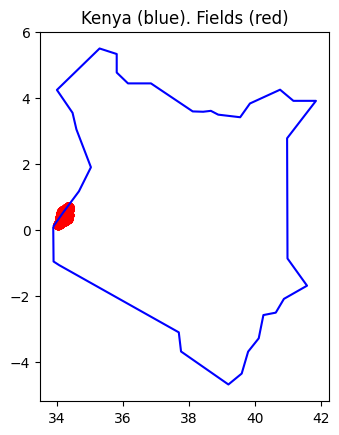

In [31]:
#@title plot the data in the context of Kenya
import warnings
import geopandas as gpd
from shapely.geometry import Point

# Sample one pixel per field to simplify visualization
report = df.copy()
report = report.sample(frac=1)
report = report[["field", "lat", "lon"]].drop_duplicates()
report = gpd.GeoDataFrame(report, geometry=[Point(xy) for xy in zip(report['lon'], report['lat'])])
report = report[["field", "geometry"]].drop_duplicates(subset="field")

# Get Kenya
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=FutureWarning)
  world = gpd.read_file("./files/countries.zip")
kenya = world[world['SOVEREIGNT'] == 'Kenya']

# Plot Kenya and our fields
fig, ax = plt.subplots()
_ = kenya.boundary.plot(ax=ax, color="blue")
_ = report.plot(ax=ax, color="red")
ax.set_title("Kenya (blue). Fields (red)")
plt.show()

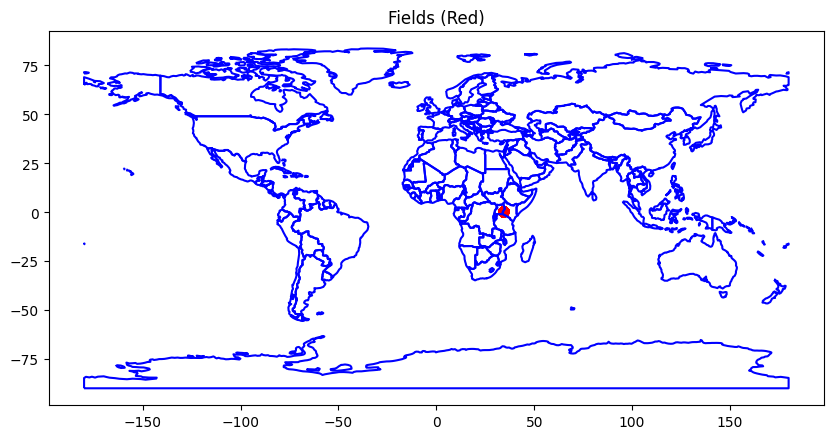

In [32]:
#@title plot the data globally

# Plot country boundaries and our fields
fig, ax = plt.subplots(figsize=(10, 7))
_ = world.boundary.plot(ax=ax, color="blue")
_ = report.plot(ax=ax, color="red")
ax.set_title("Fields (Red)")
plt.show()

Each `(pixel, time)` is a row. Let's start by removing the pixels that are cloudy:

In [33]:
# Drop pixels that have a cloud cover greater than 50
df = df[df["CLD"] < 50]

# No need to keep the `CLD` column anymore
df = df.drop(columns=["CLD"])

Let's quickly check if we have missing values:

<font color="red">Exercise 3 update the code to check the missing values? </font> (*Hint: make sure you convert your df to numpy array to check if you have any missing values*)

In [ ]:
#@title Exercise 3
import numpy as np

answer = # update me

assert answer == False
answer

In [34]:
# @title Answer to Exercise 3 (Try not to peek until you've given it a good try!')
answer = np.any(df.isna())
assert answer == False
answer

np.False_

In [35]:
#@title Split the data to train, val and test using the field column
# Set the seed for reproducibility
import numpy as np
np.random.seed(42)

# NOTE: the `deploy` labels are hidden and marked with `crop == 0`
# We use the label `crop == 0` to get the `deploy` frame and ignore it
deploy_crop_id = 0
deploy = df[df["crop"] == deploy_crop_id]

# Train/Validation/Test are the remaining rows
train_val_test = df[~df["field"].isin(deploy["field"])]

# Get the unique field IDs from the train/validation/Test rows
train_val_test_field_ids = train_val_test["field"].sample(frac=1).unique()

# Randomly select 80/10/10 split for train/val/test
val_field_ids = np.random.choice(train_val_test_field_ids, size=int(len(train_val_test_field_ids) * 0.1), replace=False)
test_field_ids = np.random.choice(list(set(train_val_test_field_ids) - set(val_field_ids)), size=int(len(train_val_test_field_ids) * 0.1), replace=False)
train_field_ids = list(set(train_val_test_field_ids) - set(val_field_ids) - set(test_field_ids))

# Create `train`, `val`, and `test` sets based on the validation field IDs
train = train_val_test[train_val_test["field"].isin(train_field_ids)]
val = train_val_test[train_val_test["field"].isin(val_field_ids)]
test = train_val_test[train_val_test["field"].isin(test_field_ids)]

# print the shapes of the train/val/test sets
train.shape, val.shape, test.shape

((475014, 17), (59183, 17), (64530, 17))

Let's verify that no data leakage is happening. We define leakage as follows:

> A validation or test farm pixels in the training dataframe (or the reverse).

In [36]:
# Verify that the sets of field IDs from `train`, `val`, and `test` are mutually exclusive
assert len(set(train["field"].unique()).intersection(set(val["field"].unique()))) == 0
assert len(set(train["field"].unique()).intersection(set(test["field"].unique()))) == 0
assert len(set(val["field"].unique()).intersection(set(test["field"].unique()))) == 0

Next, let's check the distribution of the band values we have:

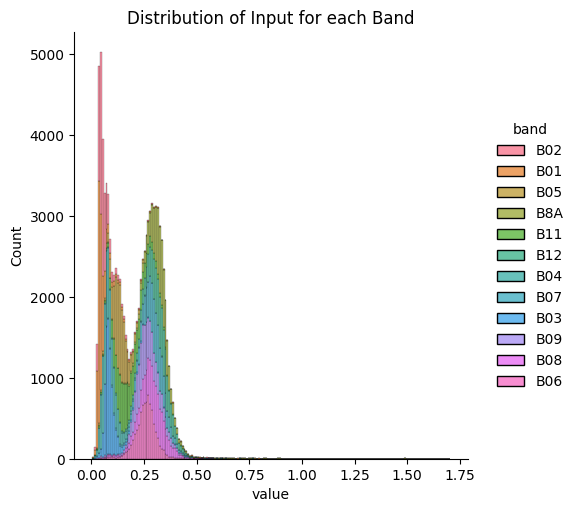

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.displot(data=train.drop(columns=["time", "lat", "lon", "field", "crop"]).melt().sample(100_000), x='value', hue="band", multiple='stack')
plt.title('Distribution of Input for each Band')
plt.show()

Let's visualize the spatial distribution of the farms by their crop IDs:

/var/folders/bq/mzm0s1912kv_9m930qmd95_r0000gn/T/ipykernel_45459/2769363312.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polygons = d.groupby(['field', 'crop']).apply(lambda df: Polygon(zip(df.lon, df.lat))).reset_index()


AttributeError: Stamen

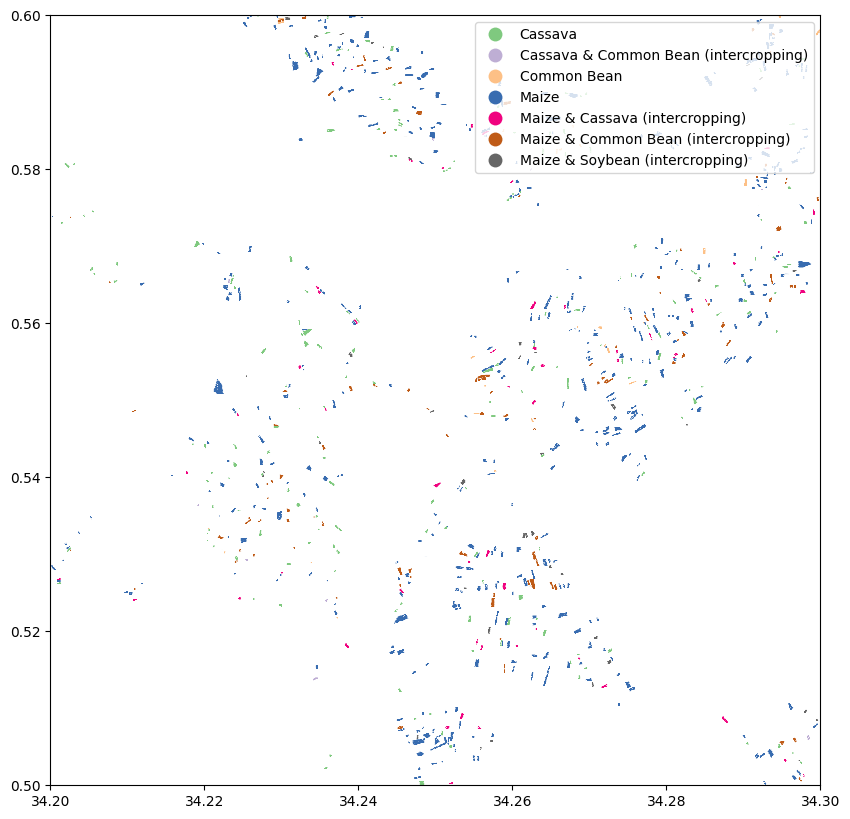

In [38]:
import contextily as ctx
from shapely.geometry import Polygon

# Create a new GeoDataFrame
d = train[["field", "lon", "lat", "crop"]].copy()

# Map crop IDs to names
id_to_name = {
    1: 'Maize',
    2: 'Cassava',
    3: 'Common Bean',
    4: 'Maize & Common Bean (intercropping)',
    5: 'Maize & Cassava (intercropping)',
    6: 'Maize & Soybean (intercropping)',
    7: 'Cassava & Common Bean (intercropping)',
}

# Replace the 'crop' column with mapped names
d['crop'] = d['crop'].map(id_to_name)

# Group by field and crop, and create polygons from point coordinates
polygons = d.groupby(['field', 'crop']).apply(lambda df: Polygon(zip(df.lon, df.lat))).reset_index()
polygons.columns = ['field', 'crop', 'geometry']

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(polygons, geometry='geometry', crs="EPSG:4326")

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame using the 'crop' column to color the polygons
gdf.plot(column="crop", legend=True, ax=ax, cmap="Accent")

# TODO: comment to check the spatial coverage of all training labels
ax.set_xlim([34.2, 34.3])
ax.set_ylim([.5, .6])

# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Terrain)

# Show the plot
plt.show()

Every field has a history of 13 dates across the growing farming season. We one field's NDVI evolution.

To emphasize vegetation, a common technique in remote sensing is to use the Normalized Difference Vegetation Index (NDVI). NDVI is a measure of the amount and condition of green vegetation present. The NDVI is calculated from the visible and near-infrared light reflected by vegetation. The formula for NDVI is:

$$NDVI = \frac{NIR-Red}{NIR+Red}$$

/Users/akramz/miniforge3/envs/geoai/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:237: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


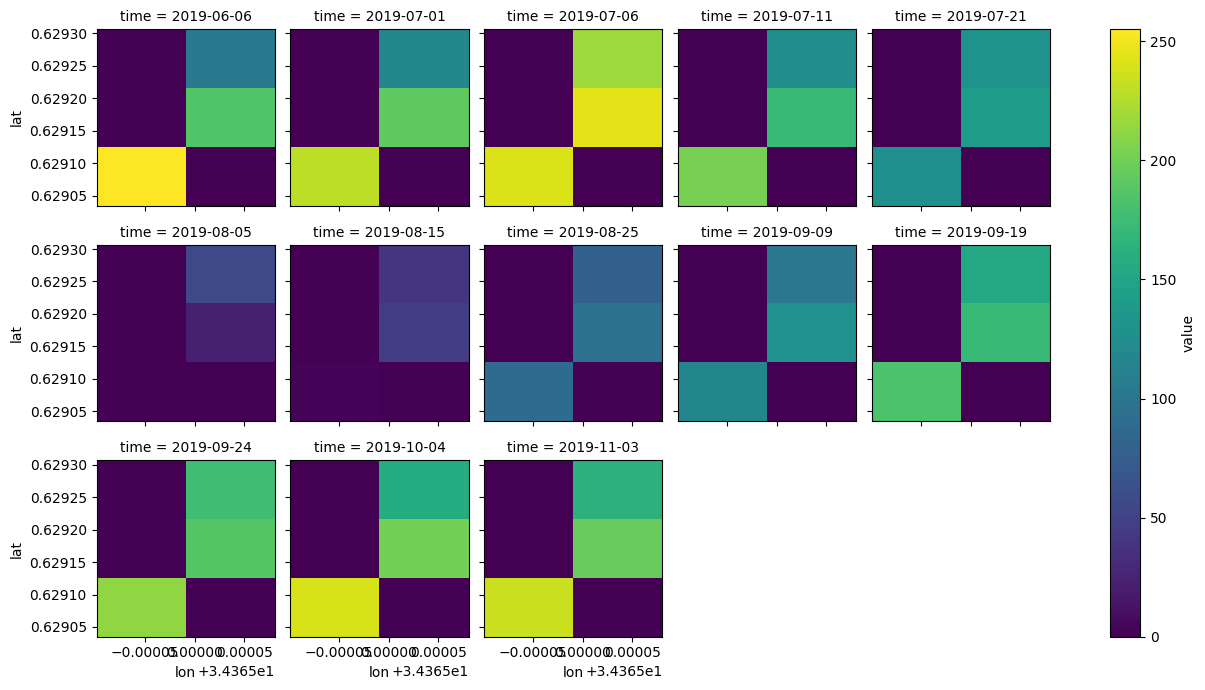

In [39]:
from random import choice

d = train.copy()
field_id = choice(d["field"].unique().tolist())
d = d.loc[d["field"] == field_id]
d = d[["time", "lat", "lon", "B08", "B04"]]
d = d.melt(id_vars=["time", "lat", "lon"], value_vars=["B08", "B04"], var_name="band", value_name="value")
d = d.set_index(["time", "lat", "lon", "band"])
d = d.to_xarray()

# Calculate NDVI and assign to 'value'
d = (d.sel(band='B08') - d.sel(band='B04')) / (d.sel(band='B08') + d.sel(band='B04'))

# Normalize NDVI to the range 0-255
d = (d.apply(lambda x: (x - x.min()) / (x.max() - x.min())) * 255).astype("uint8")

# Plot the field (each column should represent a time)
_ = d["value"].plot.imshow(col="time", x="lon", y="lat", col_wrap=5, figsize=(13, 7))

There are many more things that we can explore with data. For now, let's skip ahead to the **modeling** section.

---

#### Modeling

In this section, we aim to train a `LightGBM` model to predict each farm's crop type by summarizing the historical band information. We will go over the following:

<div style="text-align:center;">
    <figure>
        <img style="width:66%;" src="https://i.postimg.cc/8z3qzdJ0/Screenshot-2023-08-12-at-20-15-41.png" />
        <figcaption style="font-size:small;">Note: period <b>1</b> and <b>5</b> are not shown as <b>they represent single dates</b> (not intervals).</figcaption>
    </figure>
</div>

- Establishing the validation metric of a **frequency based model** that always predicts crop type frequencies derived from `y_train`.
- Feature engineering: we will calculate the following S2-based indidces:
$$
\begin{align*}
\text{NDVI} & = \frac{{B08 - B04}}{{B08 + B04}} \\
\text{RDNDVI1} & = \frac{{B08 - B05}}{{B08 + B05}} \\
\text{RDNDVI2} & = \frac{{B08 - B06}}{{B08 + B06}} \\
\text{GCVI} & = \frac{{B08}}{{B03}} - 1 \\
\text{RDGCVI1} & = \frac{{B08}}{{B05}} - 1 \\
\text{RDGCVI2} & = \frac{{B08}}{{B06}} - 1 \\
\text{MTCI} & = \frac{{B08 - B05}}{{B05 - B04}} \\
\text{MTCI2} & = \frac{{B06 - B05}}{{B05 - B04}} \\
\text{REIP} & = 700 + 40 \left( \frac{{(B04 + B07)/2 - B05}}{{B07 - B05}} \right) \\
\text{NBR1} & = \frac{{B08 - B11}}{{B08 + B11}} \\
\text{NBR2} & = \frac{{B08 - B12}}{{B08 + B12}} \\
\text{NDTI} & = \frac{{B11 - B12}}{{B11 + B12}} \\
\text{CRC} & = \frac{{B11 - B03}}{{B11 + B03}} \\
\text{STI} & = \frac{{B11}}{{B12}}
\end{align*}
$$
- **Spatial median-aggregation** by field `ID` and `time`.
- Conduct **period-based temporal aggregation** and for each band and index, create period-based columns using the following temporal groups:
    - `period 1`
        - *2019-06-06*
    - `period 2`
        - *2019-07-01*
        - *2019-07-06*
        - *2019-07-11*
        - *2019-07-21*
    - `period 3`
        - *2019-08-05*
        - *2019-08-15*
        - *2019-08-25*
    - `period 4`
        - *2019-09-09*
        - *2019-09-19*
        - *2019-09-24*
        - *2019-10-04*
    - `period 5`
        - *2019-11-03*

#### Frequency-Based Baseline Model

Establishing a baseline is crucial in machine learning to set a reference point for model performance. By using a basic approach, we can better gauge the effectiveness of more sophisticated models developed later.

The idea behind this frequency-based baseline is straightforward:

1. **Compute Class Frequencies**: Determine the proportion (or frequency) of each crop type present in the training data (`y` targets).
2. **Use Frequencies for Prediction**: For each validation sample, predict the probability of each class based on these frequencies, implying that the validation set would exhibit a similar class distribution as the training set.

This method provides a rudimentary performance measure. Any advanced models developed should aim to surpass this baseline metric, ensuring that our modeling efforts add genuine value.

In [40]:
def prepare_Xy(df):
    d = df.copy()
    d = d.groupby(["field", "time"], as_index=False).mean()
    d = d.drop("time", axis=1).groupby("field", as_index=False).mean()
    return d.drop(['field', 'crop'], axis=1), d['crop']

In [41]:
X_train, y_train = prepare_Xy(train)
X_val, y_val = prepare_Xy(val)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2630, 14), (2630,), (328, 14), (328,))

In [42]:
# Calculate the class frequencies from `y_train` in order to generate the baseline predictions
y_val_hat = np.repeat(y_train.value_counts(normalize=True).sort_index().values[None,...], y_val.shape[0], axis=0)
y_val_hat.shape

(328, 7)

<font color="red">Exercise 4 Calculate the cross entropy loss? </font> (*Hint: import the cross entropy loss from sklearn*)

In [ ]:
#@title Exercise 4: Calculate the cross entrop loss

# Calculate cross-entropy
cross_entropy = ...

assert cross_entropy == 1.4435641708151055
print(f'Cross-entropy is {cross_entropy}')

In [43]:
#@title Answer to Exercise 4 (Try not to peek until you've given it a good try!')
from sklearn.metrics import log_loss

# Calculate cross-entropy
cross_entropy = log_loss(y_val, y_val_hat)

assert cross_entropy == 1.4435641708151055

print(f'Cross-entropy is {cross_entropy}')

Cross-entropy is 1.4435641708151055


In [44]:
# .. to be used for comparison
baseline_ce = cross_entropy
baseline_ce

1.4435641708151055

Any model that we construct should have a validation cross-entropy less than the baseline cross-entropy.

#### `LightGBM`

We will create functions that cover the data preparation steps in the original section description.

Let's implement the feature engineering function that would add additional vegetation indices of interest:

In [45]:
# @title Define feature engineering function `calculate_indices(df)` (Run Cell)
def calculate_indices(df):
    """
    Compute various spectral indices commonly used in remote sensing for vegetation monitoring.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing columns for the different band values.

    Returns
    -------
    pandas.DataFrame
        The DataFrame with added columns for the calculated indices.
    """
    # Make a copy of the dataframe to avoid SettingWithCopyWarning
    df = df.copy()

    # Normalized Difference Vegetation Index (NDVI)
    df['NDVI'] = (df['B08'] - df['B04']) / (df['B08'] + df['B04'])

    # Red-edge Normalized Difference Vegetation Index (RDNDVI)
    df['RDNDVI1'] = (df['B08'] - df['B05']) / (df['B08'] + df['B05'])
    df['RDNDVI2'] = (df['B08'] - df['B06']) / (df['B08'] + df['B06'])

    # Green Chlorophyll Vegetation Index (GCVI)
    df['GCVI'] = df['B08'] / df['B03'] - 1

    # Red-edge GCVI
    df['RDGCVI1'] = df['B08'] / df['B05'] - 1
    df['RDGCVI2'] = df['B08'] / df['B06'] - 1

    # Meris Terrestrial Chlorophyll Index (MTCI)
    df['MTCI'] = (df['B08'] - df['B05']) / (df['B05'] - df['B04'])
    df['MTCI2'] = (df['B06'] - df['B05']) / (df['B05'] - df['B04'])

    # Red-edge Inflection Point (REIP)
    df['REIP'] = 700 + 40 * (((df['B04'] + df['B07']) / 2) - df['B05']) / (df['B07'] - df['B05'])

    # Normalized Burn Ratio (NBR)
    df['NBR1'] = (df['B08'] - df['B11']) / (df['B08'] + df['B11'])
    df['NBR2'] = (df['B08'] - df['B12']) / (df['B08'] + df['B12'])

    # Normalized Difference Tillage Index (NDTI)
    df['NDTI'] = (df['B11'] - df['B12']) / (df['B11'] + df['B12'])

    # Canopy Chlorophyll Content Index (CRC)
    df['CRC'] = (df['B11'] - df['B03']) / (df['B11'] + df['B03'])

    # Soil Tillage Index (STI)
    df['STI'] = df['B11'] / df['B12']

    return df

We also need function for spatial and temporal aggregation to reduce the dimensionality of the dataset:

In [46]:
#@title Define spatial `spatial_median_aggregation(df, bands)` and temporal `period_based_aggregation(df, bands)` aggregation function (Run cell)
def spatial_median_aggregation(df, bands):
    """
    Aggregate data by field and time, using the median of band values.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame with 'field', 'time', and band columns.
    bands : list
        List of band columns to be aggregated.

    Returns
    -------
    pandas.DataFrame
        Aggregated DataFrame with median band values.
    """
    # Calculate median of band values for each unique 'field' and 'time'
    agg_df = df.groupby(['field', 'time'])[bands].median().reset_index()

    # Drop duplicate entries for each unique 'field' and 'time', and remove band columns
    unique_df = df.drop_duplicates(['field', 'time']).drop(bands, axis=1)

    # Merge aggregated DataFrame with unique DataFrame
    return pd.merge(agg_df, unique_df, on=['field', 'time'])


def period_based_aggregation(df, bands):
    """
    Aggregate data by field and defined time periods, using the mean of band values.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame with 'field', 'time', and band columns.
    bands : list
        List of band columns to be aggregated.

    Returns
    -------
    pandas.DataFrame
        Aggregated DataFrame with mean band values for each time period.
    """
    # Define time periods
    periods = {
        'p1': pd.to_datetime(['2019-06-06']),
        'p2': pd.to_datetime(['2019-07-01', '2019-07-06', '2019-07-11', '2019-07-21']),
        'p3': pd.to_datetime(['2019-08-05', '2019-08-15', '2019-08-25']),
        'p4': pd.to_datetime(['2019-09-09', '2019-09-19', '2019-09-24', '2019-10-04']),
        'p5': pd.to_datetime(['2019-11-03'])
    }

    # Assign period labels based on 'time'
    for period, dates in periods.items():
        df.loc[df['time'].isin(dates), 'period'] = period

    # Calculate mean of band values for each unique 'field' and 'period'
    period_agg_df = df.groupby(['field', 'period'])[bands].mean().reset_index()

    # Drop duplicate entries for each unique 'field' and 'period', and remove band columns
    unique_df = df.drop_duplicates(['field', 'period']).drop(bands, axis=1)

    # Merge aggregated DataFrame with unique DataFrame
    return pd.merge(period_agg_df, unique_df, on=['field', 'period'])

Finally, we create functions to pivot the table (making periods into columns) and another function that runs the steps and splits the dataframe into `X` and `y`:

In [47]:
#@title Define helper functions
def pivot_dataframe(df):
    """
    Pivot the DataFrame so that each time period becomes a separate column.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame with 'field', 'period', and other columns.

    Returns
    -------
    pandas.DataFrame
        Pivoted DataFrame with each 'period' as a separate column.
    """
    return df.pivot(index=['field', 'crop', 'lat', 'lon'], columns='period').fillna(-1).reset_index()


def process_dataframe(df, bands):
    """
    Process the DataFrame by calculating indices, aggregating data, and pivoting.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame with 'field', 'time', and band columns.
    bands : list
        List of band columns to be processed.

    Returns
    -------
    X : pandas.DataFrame
        Processed DataFrame with features for machine learning.
    y : pandas.Series
        Target labels for machine learning.
    """
    # Calculate spectral indices
    df = calculate_indices(df)

    # Aggregate data by field and time using spatial median
    df = spatial_median_aggregation(df, bands)

    # Aggregate data by field and time period using mean
    df = period_based_aggregation(df, bands)

    # Calculate average latitude and longitude for each field
    lat_lon_agg = df.groupby('field')[['lat', 'lon']].mean().reset_index()

    # Merge aggregated DataFrame with latitude and longitude DataFrame
    df = pd.merge(df.drop(columns=['lat', 'lon']), lat_lon_agg, on='field', how='left')

    # Pivot DataFrame to have each period as a separate column
    df = pivot_dataframe(df)

    # Flatten multi-level column names
    df.columns = [''.join(col).strip() if isinstance(col, tuple) else col for col in df.columns.values]

    # Select columns to keep
    columns_to_keep = ['field', 'lat', 'lon', 'crop'] + [col for col in df.columns if col.endswith(('p1', 'p2', 'p3', 'p4', 'p5')) and not col.startswith(('time', 'lat', 'lon', 'crop'))]
    df = df[columns_to_keep]

    # Split DataFrame into features (X) and target labels (y)
    X, y = df.drop(["crop"], axis=1), df["crop"]

    return X, y

Let's prepare the training, validation, and test arrays:

In [48]:
# Set the band columns'
bands = ['B04', 'B05', 'B06', 'B07', 'B08', 'B11', 'B12', 'NDVI', 'RDNDVI1', 'RDNDVI2', 'GCVI', 'RDGCVI1', 'RDGCVI2', 'MTCI', 'MTCI2', 'REIP', 'NBR1', 'NBR2', 'NDTI', 'CRC', 'STI']

# Prepare the dataset
print("Processing `train` ...")
X_train, y_train = process_dataframe(train, bands)

print("Processing `val` ...")
X_val, y_val = process_dataframe(val, bands)

print("Processing `test` ...")
X_test, y_test = process_dataframe(test, bands)

# Print the shapes
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

Processing `train` ...
Processing `val` ...
Processing `test` ...


((2630, 133), (2630,), (328, 133), (328,), (328, 133), (328,))

Now, let's conduct random hyperparameter search with cross-validation using the `LightGBM` estimator:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import lightgbm as lgb

# Define the LightGBM model
model = lgb.LGBMClassifier(objective="multiclass", verbose=-1, num_class=7)
banned_cols = ["field"]

# Define the hyperparameters space
param_dist = {
    'num_leaves': [31, 127, 200, 300],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

# Define the scorer
scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=15, scoring=scorer, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train.drop(banned_cols, axis=1), y_train)

#### Evaluation

We re-train the best estimator on the training data and get the validation cross-entropy:

In [ ]:
# Create the LightGBM model instance with the best hyperparameters
model = lgb.LGBMClassifier(objective="multiclass", num_class=7, verbose=-1, **random_search.best_params_)

# Fit the model to the training set
model.fit(X_train.drop(banned_cols, axis=1), y_train)

# Predict the validation set results
y_val_hat = model.predict_proba(X_val.drop(banned_cols, axis=1))

# Report cross-entropy
print(f"Cross-entropy with best hyperparameters is {log_loss(y_val, y_val_hat):.5f}")
print(f"It is {100*(log_loss(y_val, y_val_hat) - baseline_ce)/baseline_ce:.2f}% better than the baseline")

#### Investigating Class-Imbalances

Let's report the following metrics on the combination of validation + test points:
- `Precision`
- `Recall`
- `F1`
- `Confusion matrix`

In [ ]:
# Predict the validation set results
y_test_hat = model.predict(pd.concat([X_val, X_test]).drop(banned_cols, axis=1))
y_test_arr = pd.concat([y_val, y_test]).values
y_test_hat.shape, y_test_arr.shape

<font color="red">Exercise 5 Calculate precision, recall, and F1 score?</font> (*Hint: for average variable use "average = 'weighted*, for more information you can check example: precision_score?)

In [ ]:
#@title Exercise 5 Calculate precision, recall, and F1 score?
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = #update me
recall = #update me
f1 = #update me

assert precision == 0.45818711816733754
assert recall == 0.5503048780487805
assert f1 ==  0.48797569337092017

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# @title Answer to Exercise 5 (Try not to run until you've given it a good try!')
# Calculate precision, recall, and F1 score
precision = precision_score(y_test_arr, y_test_hat, average='weighted')
recall = recall_score(y_test_arr, y_test_hat, average='weighted')
f1 = f1_score(y_test_arr, y_test_hat, average='weighted')

assert precision == 0.45818711816733754
assert recall == 0.5503048780487805
assert f1 ==  0.48797569337092017

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_arr, y_test_hat, normalize="true")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, xticklabels=id_to_name.values(), yticklabels=id_to_name.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Except for `maize` (which is majority class), we are not doing well classifiying the other minority crop classes. Since cross-entropy does not mitigate against class imbalance, we still get a good score.

*Hint: try changing `LGBMClassifier`'s `class_weight` attribute to `balanced`.*

#### XAI

What are the most important periods and indices?

In [ ]:
import shap

# Prepare the validation + test data for the model
X_vt = pd.concat([X_val, X_test])

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_vt.drop(banned_cols, axis=1))

shap.summary_plot(shap_values, X_vt.drop(banned_cols, axis=1))

Let's figure out which periods are the most important:

In [ ]:
# Compute the absolute SHAP values for each feature
abs_shap_values = np.sum(np.abs(shap_values), axis=(0, 1))

# Get the feature names
feature_names = X_vt.drop(banned_cols, axis=1).columns

# Create a DataFrame linking feature names to their importance
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': abs_shap_values
})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Drop `lat` and `lon` from the dataset
feature_importances = feature_importances[feature_importances["feature"].isin(["lat", "lon"]) == False]

# Normalize the feature importances to sum to one
feature_importances['importance'] = feature_importances['importance'] / feature_importances['importance'].sum()

# Split the feature name into `index` and `period` (period is the last two characters)
feature_importances['period'] = feature_importances['feature'].str[-2:]
feature_importances['index'] = feature_importances['feature'].str[:-2]
feature_importances = feature_importances.drop("feature", axis=1)

# Get the most important periods separately by aggregating their importance
periods = feature_importances.drop("index", axis=1).groupby('period').sum().sort_values('importance', ascending=False)

# Get the most important bands separately by aggregating their importance
bands = feature_importances.drop("period", axis=1).groupby('index').sum().sort_values('importance', ascending=False)

In [ ]:
periods

In [ ]:
bands.iloc[:10]

We highlight the following top indices:

- `NBR2`: Normalized Burn Ratio 2. It is used in remote sensing to identify burned areas. It uses the Near Infrared (NIR) and Shortwave Infrared (SWIR) portions of the electromagnetic spectrum.
- `CRC`: Canopy Chlorophyll Content Index. It is used to estimate the chlorophyll content in plant canopies.
- `B01`: Band 1 of Sentinel-2. This is a coastal aerosol band and captures light in the blue portion of the electromagnetic spectrum.
- `B08`: Band 8 of Sentinel-2. This is a NIR (Near Infrared) band. It is often used in vegetation analysis as it reflects maximum light in healthy vegetation.
- `GCVI`: Green Chlorophyll Vegetation Index. It is used to measure the chlorophyll content of vegetation by using the Green and Near-Infrared bands.
- `REIP`: Red Edge Inflection Point. It is used in vegetation studies to indicate the boundary between the red and NIR region of the spectrum where vegetation has a strong reflection.
- `B8A`: Band 8a of Sentinel-2. This is a Narrow NIR (Near Infrared) band. It is used to study water bodies and vegetation.
- `B06`: Band 6 of Sentinel-2. It is a red-edge band, which is useful for vegetation studies.
- `RDNDVI2`: Ratio Divergence Normalized Difference Vegetation Index 2. This is presumably a custom vegetation index that uses a ratio and divergence calculation to normalize the vegetation index.
- `B09`: Band 9 of Sentinel-2. It is a water vapor band, useful for atmospheric studies.

#### Inference

In this section, we will report the final metrics on the validation set and visualize the farms with their crop types:

In [ ]:
# Predict on the test set
y_test_pred = model.predict_proba(X_test.drop(banned_cols, axis=1))
y_test_pred.shape

In [ ]:
# Export the results
report = X_test[["field"]].copy()

# Create the Crop_ID_1,Crop_ID_2,Crop_ID_3,Crop_ID_4,Crop_ID_5,Crop_ID_6,Crop_ID_7 columns and assign the predictions
cols = ['Crop_ID_1','Crop_ID_2','Crop_ID_3','Crop_ID_4','Crop_ID_5','Crop_ID_6','Crop_ID_7']
report[cols] = y_test_pred
report

Let's visualize the predicted test farms:

In [ ]:
from shapely.geometry import Point, LineString, Polygon

def create_geometry(df):
    coords = list(zip(df.lon, df.lat))
    if len(coords) == 1: return Point(coords[0])
    elif len(coords) == 2: return LineString(coords)
    else: return Polygon(coords)

# Create the polygons from the test set
d = test.copy()
cols = ["field", "lat", "lon"]
d = d[cols].drop_duplicates()
d = d.groupby('field').apply(create_geometry).reset_index().rename(columns={0: "geometry"})

# Create the dataframe to hold the pixel locations and the predicted crop types
report = X_test.copy()
report = report[["field"]]
report["crop"] = y_test_pred.argmax(axis=1) + 1

# Merge the two dataframes
report = report.merge(d, on="field", how="left").rename(columns={0: "geometry"})
report = gpd.GeoDataFrame(report, geometry="geometry")

# Replace the 'crop' column with mapped names
report['crop'] = report['crop'].map(id_to_name)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame using the 'crop' column to color the polygons
report.plot(column="crop", legend=True, ax=ax, cmap="Accent")

# Add a basemap
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.Stamen.Terrain)

# Show the plot
plt.show()

---

### 2.3 Model 2: Deep Learning <font color='purple'>`Experimental`</font>

<center><img src="https://drive.google.com/u/0/uc?id=1pd_-Azeunh7O7SoxXWhrZ5_f9O4wq1tU&export=download" width="750px;" /></center>

#### Data Preprocessing

We have conducted the following steps to produce the `X.npy` and `y.npy` files:
1. **Data normalization**: squared-root all bands in the Sentinel-2 imagery.
2. **Farm masking**: Added an extra binary band that shows where the farm pixels are.
3. **Farm Extraction**: For each field polygon, we get its center location and crop a 32x32 window from the original image to create the patches.
4. **Patch Standardization**: Each patch was standardized using the temporal band-wise mean and standard deviation.
5. **Creating a single Cube**: stacked all patches and their labels into 2 unified cubes and saved them as `X.npy` and `y.npy`.

Let's download the data for deep learning:

In [49]:
#@hidden_cell# Set the URLs of the files
# @title Next, we need to download the necessary files to be used in this practical:. (Run Cell)
dl_arrays_url = "https://drive.google.com/uc?export=download&id=1vHws-qgnzA9JOO5CCPFZadKNnsckJ2Yd"

# Download
download_file_from_google_drive(dl_arrays_url, data_dir, "deep_learning_arrays.zip")
with zipfile.ZipFile(os.path.join(data_dir, "deep_learning_arrays.zip"), "r") as zip_ref:
    zip_ref.extractall(data_dir)

#### Class Implementations

As we now have the NumPy arrays for training, we want to implement a sequence-to-one classification model.

Here are the choices that we are going to implement:
- Encode each image using a pre-trained encoder (ResNet18).
- Pass the sequence of encodings to a 3-layer Bi-directional GRU.
- Take the final concatenated output representation from the GRU and pass it through a fully-connected layer to predict the final class probabilities (7 classes).
- Use cross entropy as the loss function.
- Conduct data augmentation to regularize the model.
- Export the validation results

#### Dataset

Let's start with the `FieldSequenceDataset` class.

We have a series of images taken of a field over time, and each of these sequences of images corresponds to a `label` (e.g., the type of crop in the field). The `FieldSequenceDataset` class is designed to manage and provide easy access to these sequences of images and their corresponding labels.

##### **Key Methods**
- `__len__`: This returns the number of items in the dataset.
- `__getitem__`: Given an index, it provides the images sequence and its label.
- `plot`: lets you visualize a sequence of field images.

##### **Why is this useful?**
By structuring the data in this way, it becomes much easier to:
- Feed data into machine learning models.
- Apply consistent modifications to sequences.
- Visualize and understand the data you're working with.

In [ ]:
#@title Implement the `__len__` and `__getitem__` methods
class FieldSequenceDataset(Dataset):
    """
    A dataset class for sequences of field images.

    Attributes:
    - X: Numpy array containing image sequences.
    - y: Labels associated with each image sequence.
    - classes: List of class names/labels.
    - transforms: Optional data augmentation operations.

    Methods:
    - __len__ : Returns the length of the dataset.
    - __getitem__ : Fetches a data sample for a given index.
    - plot: Plots an image sequence from a given sample.
    """

    def __init__(
        self,
        X,
        y,
        field_ids: List[int],
        transforms: Optional[Callable] = None
    ) -> None:
        """
        Initializes the dataset object.

        Parameters:
        - X: Numpy array containing image sequences of shape (num_samples, num_images, height, width, bands).
        - y: Numpy array containing labels for each sequence.
        - field_ids: List of indices to subset the dataset. Defaults to None (use all data).
        - transforms: Optional data augmentation operations.
        """

        # Define class labels
        self.classes = [str(i) for i in range(1, 8)]

        # Instead of slicing the data, store the indices
        self.field_ids = field_ids
        self.X = X
        self.y = y

        # Set the data augmentation transforms
        self.transforms = transforms

    def __len__(self) -> int:
        """Returns the number of samples in the dataset."""
        pass

    def __getitem__(self, index: int) -> dict[str, torch.Tensor]:
        """
        Returns a data sample given an index.

        Parameters:
        - index: Index of the sample to fetch.

        Returns:
        Dictionary containing the image sequence and its associated label.
        """
        pass

    def plot(
        self,
        sample: Dict[str, Any],
        show_titles: bool = True,
        suptitle: Optional[str] = None,
    ) -> plt.Figure:
        """
        Plots an image sequence from a sample.

        Parameters:
        - sample: Dictionary containing an image sequence and its label.
        - show_titles: Whether to display titles on the plots.
        - suptitle: Optional overarching title for the entire plot.

        Returns:
        Matplotlib figure object.
        """

        # Extract and normalize image sequence
        sequence = sample['image'].numpy()[:, [3, 2, 1], :, :]
        label = sample['label'].item()
        min_vals = sequence.min(axis=(0, 2, 3), keepdims=True)
        max_vals = sequence.max(axis=(0, 2, 3), keepdims=True)
        sequence = (sequence - min_vals) / (max_vals - min_vals)

        # Calculate layout for plotting multiple images
        num_images = sequence.shape[0]
        num_rows = int(np.ceil(num_images / 4.0))

        # Create a figure and plot each image in the sequence
        fig, axarr = plt.subplots(num_rows, 4, figsize=(15, 4 * num_rows))
        if num_rows == 1:
            axarr = np.expand_dims(axarr, axis=0)
        for i in range(num_rows):
            for j in range(4):
                idx = i * 4 + j
                if idx < num_images:
                    ax = axarr[i, j]
                    ax.imshow(sequence[idx].transpose(1, 2, 0))
                    ax.axis('off')
                    if show_titles and idx == num_images - 1:
                        ax.set_title(f'Label: {self.classes[label]}')
                else:
                    axarr[i, j].axis('off')

        # Set the optional overarching title
        if suptitle:
            fig.suptitle(suptitle, fontsize=16)

        return fig

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')
class FieldSequenceDataset(Dataset):
    """
    A dataset class for sequences of field images.

    Attributes:
    - X: Numpy array containing image sequences.
    - y: Labels associated with each image sequence.
    - classes: List of class names/labels.
    - transforms: Optional data augmentation operations.

    Methods:
    - __len__ : Returns the length of the dataset.
    - __getitem__ : Fetches a data sample for a given index.
    - plot: Plots an image sequence from a given sample.
    """

    def __init__(
        self,
        X,
        y,
        field_ids: List[int],
        transforms: Optional[Callable] = None
    ) -> None:
        """
        Initializes the dataset object.

        Parameters:
        - X: Numpy array containing image sequences of shape (num_samples, num_images, height, width, bands).
        - y: Numpy array containing labels for each sequence.
        - field_ids: List of indices to subset the dataset. Defaults to None (use all data).
        - transforms: Optional data augmentation operations.
        """

        # Define class labels
        self.classes = [str(i) for i in range(1, 8)]

        # Instead of slicing the data, store the indices
        self.field_ids = field_ids
        self.X = X
        self.y = y

        # Set the data augmentation transforms
        self.transforms = transforms

    def __len__(self) -> int:
        """Returns the number of samples in the dataset."""
        return len(self.field_ids)

    def __getitem__(self, index: int) -> dict[str, torch.Tensor]:
        """
        Returns a data sample given an index.

        Parameters:
        - index: Index of the sample to fetch.

        Returns:
        Dictionary containing the image sequence and its associated label.
        """

        # Use the field_ids to fetch the relevant data
        sequence = self.X[self.field_ids[index]]
        label = self.y[self.field_ids[index]]

        # Convert them to PyTorch tensors
        sample = {'image': torch.tensor(sequence, dtype=torch.float32), 'label': torch.tensor(label, dtype=torch.long)}

        return sample

    def plot(
        self,
        sample: Dict[str, Any],
        show_titles: bool = True,
        suptitle: Optional[str] = None,
    ) -> plt.Figure:
        """
        Plots an image sequence from a sample.

        Parameters:
        - sample: Dictionary containing an image sequence and its label.
        - show_titles: Whether to display titles on the plots.
        - suptitle: Optional overarching title for the entire plot.

        Returns:
        Matplotlib figure object.
        """

        # Extract and normalize image sequence
        sequence = sample['image'].numpy()[:, [3, 2, 1], :, :]
        label = sample['label'].item()
        min_vals = sequence.min(axis=(0, 2, 3), keepdims=True)
        max_vals = sequence.max(axis=(0, 2, 3), keepdims=True)
        sequence = (sequence - min_vals) / (max_vals - min_vals)

        # Calculate layout for plotting multiple images
        num_images = sequence.shape[0]
        num_rows = int(np.ceil(num_images / 4.0))

        # Create a figure and plot each image in the sequence
        fig, axarr = plt.subplots(num_rows, 4, figsize=(15, 4 * num_rows))
        if num_rows == 1:
            axarr = np.expand_dims(axarr, axis=0)
        for i in range(num_rows):
            for j in range(4):
                idx = i * 4 + j
                if idx < num_images:
                    ax = axarr[i, j]
                    ax.imshow(sequence[idx].transpose(1, 2, 0))
                    ax.axis('off')
                    if show_titles and idx == num_images - 1:
                        ax.set_title(f'Label: {self.classes[label]}')
                else:
                    axarr[i, j].axis('off')

        # Set the optional overarching title
        if suptitle:
            fig.suptitle(suptitle, fontsize=16)

        return fig

#### Data Module

In machine learning, it's common to split our data into three parts:
- **Training set**: to train our model.
- **Validation set**: to tune and optimize our model's parameters.
- **Test set**: to check how well our model will perform in real-world scenarios.

The next class we are going to implement (`FieldDataModule`) is a utility to handle and organize this process, especially for our field image sequences.

##### **Why is this helpful?**
- Organization: Keeps data management clean and structured.
- Flexibility: Easily change the size of each dataset or the batch size.
- Efficiency: Facilitates parallel data loading, so you spend less time waiting and more time training.

In [ ]:
#@title Implement the `setup()`, `train_dataloader()`, `val_dataloader()`, and `test_dataloader()` methods
class FieldDataModule(LightningDataModule):
    """
    PyTorch Lightning data module for handling field sequence data.

    This class helps in loading and splitting the dataset into train, validation, and test sets.

    Attributes:
    - root: The path to the root directory containing the data.
    - batch_size: Size of the batches during training.
    - workers: Number of workers for data loading.
    - X: Numpy array containing image sequences.
    - y: Numpy array containing labels for each sequence.
    - train_ids, val_ids, test_ids: Lists containing indices for the train, validation, and test splits respectively.
    - train_ds, val_ds, test_ds: Dataset objects for the train, validation, and test sets.
    """

    def __init__(
        self,
        root: str,
        train_size: float = 0.7,
        val_size: float = 0.2,
        test_size: float = 0.1,
        batch_size: int = 8,
        workers: int = 4,
    ):
        super().__init__()

        # Define directory path and loading configurations
        self.root = Path(root)
        self.batch_size = batch_size
        self.workers = workers

        # Load the dataset into memory
        self.X = np.load(self.root / "X.npy")
        self.y = np.load(self.root / "y.npy")

        # Randomly shuffle field IDs for dataset split
        all_field_ids = list(range(3280))
        shuffle(all_field_ids)

        # Split the dataset into train, validation, and test sets based on provided ratios
        self.train_ids, temp_ids = train_test_split(all_field_ids, test_size=1 - train_size, random_state=42)
        self.val_ids, self.test_ids = train_test_split(temp_ids, test_size=test_size / (test_size + val_size), random_state=42)

        # Setup datasets
        self.setup()

    def setup(self, stage=None):
        """
        Prepare datasets for training, validation, and testing.

        Uses the field IDs generated during initialization to subset the full dataset.
        """
        pass

    def train_dataloader(self):
        """Returns a DataLoader object for the training dataset."""
        pass

    def val_dataloader(self):
        """Returns a DataLoader object for the validation dataset."""
        pass

    def test_dataloader(self):
        """Returns a DataLoader object for the test dataset."""
        pass

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')
class FieldDataModule(LightningDataModule):
    """
    PyTorch Lightning data module for handling field sequence data.

    This class helps in loading and splitting the dataset into train, validation, and test sets.

    Attributes:
    - root: The path to the root directory containing the data.
    - batch_size: Size of the batches during training.
    - workers: Number of workers for data loading.
    - X: Numpy array containing image sequences.
    - y: Numpy array containing labels for each sequence.
    - train_ids, val_ids, test_ids: Lists containing indices for the train, validation, and test splits respectively.
    - train_ds, val_ds, test_ds: Dataset objects for the train, validation, and test sets.
    """

    def __init__(
        self,
        root: str,
        train_size: float = 0.7,
        val_size: float = 0.2,
        test_size: float = 0.1,
        batch_size: int = 8,
        workers: int = 4,
    ):
        super().__init__()

        # Define directory path and loading configurations
        self.root = Path(root)
        self.batch_size = batch_size
        self.workers = workers

        # Load the dataset into memory
        self.X = np.load(self.root / "X.npy")
        self.y = np.load(self.root / "y.npy")

        # Randomly shuffle field IDs for dataset split
        all_field_ids = list(range(3280))
        shuffle(all_field_ids)

        # Split the dataset into train, validation, and test sets based on provided ratios
        self.train_ids, temp_ids = train_test_split(all_field_ids, test_size=1 - train_size, random_state=42)
        self.val_ids, self.test_ids = train_test_split(temp_ids, test_size=test_size / (test_size + val_size), random_state=42)

        # Setup datasets
        self.setup()

    def setup(self, stage=None):
        """
        Prepare datasets for training, validation, and testing.

        Uses the field IDs generated during initialization to subset the full dataset.
        """
        self.train_ds = FieldSequenceDataset(self.X, self.y, self.train_ids)
        self.val_ds = FieldSequenceDataset(self.X, self.y, self.val_ids)
        self.test_ds = FieldSequenceDataset(self.X, self.y, self.test_ids)

    def train_dataloader(self):
        """Returns a DataLoader object for the training dataset."""
        return DataLoader(self.train_ds, batch_size=self.batch_size, num_workers=self.workers, shuffle=True)

    def val_dataloader(self):
        """Returns a DataLoader object for the validation dataset."""
        return DataLoader(self.val_ds, batch_size=self.batch_size, num_workers=self.workers, shuffle=False)

    def test_dataloader(self):
        """Returns a DataLoader object for the test dataset."""
        return DataLoader(self.test_ds, batch_size=self.batch_size, num_workers=self.workers, shuffle=False)

#### Model Architecture

Now, to the model architecture. Imagine you have sequences of images captured over time, and you want to classify each sequence into a category. In our case, the sequence are images of a field, and we want to identify the crop grown in that field based on the sequence.

##### **Main Components**
- `ResNet18 Encoder`: Every image in the sequence is first processed by this encoder, which extracts important features from each image. Think of this as converting a detailed image into a summarized version that retains all the essential information.
- `Bidirectional GRU`: Once we have the features for each image in the sequence, this component helps the model understand the order and relationship between these images. It looks at the sequence forwards and backwards, ensuring it captures patterns that emerge over time.
- `Fully Connected Layer`: After understanding the sequence, this part of the model makes the final decision. It takes the output of the GRU and classifies the entire sequence into one of the categories.

In [ ]:
#@title Implement the `forward()` method
class SequenceClassificationModel(nn.Module):
    """
    Neural network model for sequence classification tasks.

    This model consists of a ResNet18 encoder, a bidirectional GRU, and a fully connected classifier.
    Given an input sequence of images, it outputs class probabilities for each sequence.

    Attributes:
    - encoder: ResNet18 encoder for feature extraction from each image in the sequence.
    - gru: Bidirectional GRU to model temporal dependencies in the sequence of features.
    - fc: Fully connected layer to produce class probabilities.
    """

    def __init__(self, in_channels: int, input_size: int, hidden_size: int, num_layers: int, num_classes: int):
        """
        Initialize the model.

        Parameters:
        - in_channels (int): Number of channels in the input images.
        - input_size (int): Size of the encoded image features, which serves as the input size for the GRU.
        - hidden_size (int): Number of units in the hidden layer of the GRU.
        - num_layers (int): Number of recurrent layers in the GRU.
        - num_classes (int): Number of output classes for classification.
        """
        super(SequenceClassificationModel, self).__init__()

        # Create ResNet18 encoder using timm, configured for the specified number of input channels.
        self.encoder = timm.create_model(
            "resnet18",
            num_classes=0,  # Setting to 0 removes the classification head.
            in_chans=in_channels,
            pretrained=True
        )

        # Bidirectional GRU for modeling sequences.
        self.gru = nn.GRU(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)

        # Fully connected layer for outputting class probabilities.
        self.fc = nn.Linear(2 * hidden_size, num_classes)  # 2 * hidden_size because the GRU is bidirectional.

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the model.

        Parameters:
        - x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, channels, height, width).

        Returns:
        - torch.Tensor: Output tensor of class probabilities with shape (batch_size, num_classes).
        """
        pass

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')
class SequenceClassificationModel(nn.Module):
    """
    Neural network model for sequence classification tasks.

    This model consists of a ResNet18 encoder, a bidirectional GRU, and a fully connected classifier.
    Given an input sequence of images, it outputs class probabilities for each sequence.

    Attributes:
    - encoder: ResNet18 encoder for feature extraction from each image in the sequence.
    - gru: Bidirectional GRU to model temporal dependencies in the sequence of features.
    - fc: Fully connected layer to produce class probabilities.
    """

    def __init__(self, in_channels: int, input_size: int, hidden_size: int, num_layers: int, num_classes: int):
        """
        Initialize the model.

        Parameters:
        - in_channels (int): Number of channels in the input images.
        - input_size (int): Size of the encoded image features, which serves as the input size for the GRU.
        - hidden_size (int): Number of units in the hidden layer of the GRU.
        - num_layers (int): Number of recurrent layers in the GRU.
        - num_classes (int): Number of output classes for classification.
        """
        super(SequenceClassificationModel, self).__init__()

        # Create ResNet18 encoder using timm, configured for the specified number of input channels.
        self.encoder = timm.create_model(
            "resnet18",
            num_classes=0,  # Setting to 0 removes the classification head.
            in_chans=in_channels,
            pretrained=True
        )

        # Bidirectional GRU for modeling sequences.
        self.gru = nn.GRU(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)

        # Fully connected layer for outputting class probabilities.
        self.fc = nn.Linear(2 * hidden_size, num_classes)  # 2 * hidden_size because the GRU is bidirectional.

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the model.

        Parameters:
        - x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, channels, height, width).

        Returns:
        - torch.Tensor: Output tensor of class probabilities with shape (batch_size, num_classes).
        """
        batch_size, seq_len, C, H, W = x.shape

        # Reshape to pass individual images through the encoder.
        x = x.view(batch_size * seq_len, C, H, W)

        # Pass through encoder to obtain encoded features.
        x = self.encoder(x)

        # Reshape back to sequence format for GRU.
        x = x.view(batch_size, seq_len, -1)

        # Pass through GRU. We only need the hidden state of the last layer.
        _, h_n = self.gru(x)

        # Reshape hidden states and concatenate the hidden states of the last layer's forward and backward passes.
        h_n = h_n.view(self.gru.num_layers, 2, batch_size, self.gru.hidden_size)
        final_hidden = torch.cat((h_n[-1, 0], h_n[-1, 1]), dim=-1)

        # Pass through the classifier to get class probabilities.
        output = self.fc(final_hidden)
        return output

#### Data Augmentation

We design the `SequenceAugmentationPipeline` class to address the challenge of consistent augmentation across sequences. We also want to introduce variability (augmentation) in our data for better model training.

##### **Key Components**
- Random Horizontal Flip: This might mirror your image as if you're looking at its reflection in a pond.
- Random Vertical Flip: Imagine flipping your photo upside-down.
- Random Rotation: This slightly rotates your image, just as if you'd tilted your camera a bit.

In [ ]:
#@title Implement the `forward()` method
class SequenceAugmentationPipeline(nn.Module):
    """
    A data augmentation pipeline for sequences of images.

    This module defines a set of transformations that are applied across
    all images in a sequence.

    Attributes:
    - hflip: Random horizontal flip transformation.
    - vflip: Random vertical flip transformation.
    """

    def __init__(self) -> None:
        """
        Initialize the augmentation pipeline with desired transformations.
        """
        super(SequenceAugmentationPipeline, self).__init__()

        self.hflip = K.RandomHorizontalFlip()
        self.vflip = K.RandomVerticalFlip()

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Apply the transformations consistently across each image in the sequence.

        Parameters:
        - input (torch.Tensor): Input tensor of shape (batch_size, sequence_length, bands, height, width).

        Returns:
        - torch.Tensor: Augmented tensor with the same shape as input.
        """
        pass

In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')
class SequenceAugmentationPipeline(nn.Module):
    """
    A data augmentation pipeline for sequences of images.

    This module defines a set of transformations that can be applied independently
    to each image in a sequence, allowing for variability in augmentations across
    the sequence.

    Attributes:
    - hflip: Random horizontal flip transformation.
    - vflip: Random vertical flip transformation.
    """

    def __init__(self) -> None:
        """
        Initialize the augmentation pipeline with desired transformations.
        """
        super(SequenceAugmentationPipeline, self).__init__()

        self.hflip = K.RandomHorizontalFlip()
        self.vflip = K.RandomVerticalFlip()

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Apply the transformations independently across each image in the sequence.

        Parameters:
        - input (torch.Tensor): Input tensor of shape (batch_size, sequence_length, bands, height, width).

        Returns:
        - torch.Tensor: Augmented tensor with the same shape as input.
        """

        # Apply the transformations to each image in the sequence.
        transformed_seq = []
        for image in input.unbind(dim=1):
            hflip_params = self.hflip.forward_parameters(image.shape)
            vflip_params = self.vflip.forward_parameters(image.shape)

            image = self.hflip(image, hflip_params)
            image = self.vflip(image, vflip_params)
            transformed_seq.append(image)

        # Combine the transformed images back into the sequence format.
        output = torch.stack(transformed_seq, dim=1)

        return output

#### Task

The following class helps us manage the training process using Pytorch-Lightning:

In [ ]:
#@title Create the task class
class SequenceClassificationTask(LightningModule):
    """
    Lightning module for the sequence classification task.

    This module wraps the SequenceClassificationModel for training, validation, and testing.
    It also handles data augmentation using the SequenceAugmentationPipeline.

    Attributes:
    - model: The sequence classification model.
    - loss_fn: Loss function for classification.
    - learning_rate: Learning rate for the optimizer.
    - aug: Data augmentation pipeline for training sequences.
    """

    def __init__(self, input_size, hidden_size, in_channels=14, num_layers=3, num_classes=7, learning_rate=0.001):
        """
        Initialize the lightning module.

        Parameters:
        - input_size (int): Size of the input to the GRU.
        - hidden_size (int): Size of the GRU hidden state.
        - in_channels (int, optional): Number of input channels to the model. Defaults to 14.
        - num_layers (int, optional): Number of GRU layers. Defaults to 3.
        - num_classes (int, optional): Number of classification classes. Defaults to 7.
        - learning_rate (float, optional): Learning rate for the optimizer. Defaults to 0.001.
        """
        super(SequenceClassificationTask, self).__init__()

        self.model = SequenceClassificationModel(in_channels, input_size, hidden_size, num_layers, num_classes)
        self.loss_fn = nn.CrossEntropyLoss()
        self.learning_rate = learning_rate

        # Define the data augmentation pipeline for training.
        self.aug = SequenceAugmentationPipeline()

    def forward(self, x):
        """
        Forward pass through the model.

        Parameters:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Model predictions.
        """
        return self.model(x)

    def training_step(self, batch, batch_idx):
        """
        Defines a single step during training.

        Parameters:
        - batch (dict): Batch of data.
        - batch_idx (int): Index of the batch.

        Returns:
        - torch.Tensor: Training loss.
        """
        x, y = batch["image"], batch["label"]

        # Apply data augmentation to the training data.
        x = self.aug(x)

        logits = self(x)
        loss = self.loss_fn(logits, y)

        # Log training loss to TensorBoard.
        self.log("train_loss", loss)

        return loss

    def validation_step(self, batch, batch_idx):
        """
        Defines a single step during validation.

        Parameters:
        - batch (dict): Batch of data.
        - batch_idx (int): Index of the batch.

        Returns:
        - torch.Tensor: Validation loss.
        """
        x, y = batch["image"], batch["label"]
        logits = self(x)
        loss = self.loss_fn(logits, y)

        # Log validation loss to TensorBoard.
        self.log("val_loss", loss)

        return loss

    def test_step(self, batch, batch_idx):
        """
        Defines a single step during testing.

        Parameters:
        - batch (dict): Batch of data.
        - batch_idx (int): Index of the batch.

        Returns:
        - torch.Tensor: Testing loss.
        """
        x, y = batch["image"], batch["label"]
        logits = self(x)
        loss = self.loss_fn(logits, y)

        # Log testing loss to TensorBoard.
        self.log("test_loss", loss)

        return loss

    def configure_optimizers(self):
        """
        Configures the optimizer(s) and learning rate scheduler(s).

        Returns:
        - Dict: Contains optimizer and learning rate scheduler information.
        """
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.learning_rate)

        # Define a learning rate scheduler that reduces the learning rate when the validation loss plateaus.
        scheduler = ReduceLROnPlateau(optimizer, patience=5)

        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "monitor": "val_loss",
            },
        }

#### **Training**

We train the model:

In [ ]:
# Set training config
root = "./files"
experiment_name = "seq2one-poc"
gpu = 0
min_epochs, max_epochs = 3, 50

# Set the hyperparameters
batch_size = 64
learning_rate = 0.001
hidden_size = 128
num_layers = 3
early_stopping_patience = 15

In [ ]:
# Create the data module
dm = FieldDataModule(root=root, batch_size=batch_size, workers=2)

In [ ]:
# Create the task with the sampled hyperparameters
task = SequenceClassificationTask(input_size=512,
                                  hidden_size=hidden_size,
                                  num_layers=num_layers,
                                  learning_rate=learning_rate)

# Create a dedicated models' directory for saving the trial's best models
models_path = Path(f"./models/{experiment_name}/")
models_path.mkdir(parents=True, exist_ok=True)

# Set the callbacks
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath=models_path,
    filename=f"model-{{epoch:02d}}-{{val_loss:.2f}}",
    save_top_k=1,
    mode="min",
)
early_stopping_callback = EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=early_stopping_patience)

# Create a TensorBoard logger
logger = TensorBoardLogger("./tb_logs", name=experiment_name)

# Trainer definition
trainer = Trainer(
    logger=logger,
    accelerator='gpu',
    devices=[gpu],
    max_epochs=max_epochs,
    min_epochs=min_epochs,
    callbacks=[checkpoint_callback, early_stopping_callback],
    precision=16
)

trainer.fit(model=task, datamodule=dm)

Let's check the best validation score:

In [ ]:
checkpoint_callback.best_model_score.item()

Let's get the prediction of the deep learning model on the test set:

In [ ]:
# Load your model
model = SequenceClassificationTask.load_from_checkpoint(trainer.checkpoint_callback.best_model_path,
                                                        input_size=512,
                                                        hidden_size=hidden_size)
model.eval()
model.freeze()

# Get the validation data loader
test_dl = dm.test_dataloader()

# Predict
all_logits = []
y_tests = []

with torch.no_grad():
    for batch in test_dl:
        inputs = batch['image']
        y_test = batch['label']
        logits = model(inputs)
        all_logits.append(logits)
        y_tests.append(y_test)

# Concatenate all the results
all_logits = torch.cat(all_logits, dim=0)
y_test = torch.cat(y_tests, dim=0)

# Get the probabilities
y_test_hat = torch.nn.functional.softmax(all_logits, dim=1)

Let's calculate the final metrics:

In [ ]:
from sklearn.metrics import log_loss

# Get the arrays
y_test_np = y_test.cpu().numpy()
y_test_hat_np = y_test_hat.cpu().numpy()

# Convert y_val to a binary label indicator format
y_test_bin = label_binarize(y_test_np, classes=[0, 1, 2, 3, 4, 5, 6])

cross_entropy = log_loss(y_test_bin, y_test_hat_np)
print("Cross Entropy:", cross_entropy)

### Improve the Results - <font color='purple'>`Homework`</font>

The neural network has not beaten the `LightGBM` model results. Attempt to improve the results, suggestions:

- [ ] **Data augmentation**: try other data augmentation techniques: MixUp, random crops, Rotation, etc.
- [ ] **Lighter architecture**: replace the `ResNet` encoder with a simpler CNN architecture with fewer parameters.
- [ ] **Hyperparameter tuning**: try different values for hyperparameters like learning rate, batch size, etc.
- [ ] **Preprocessing**: derive standardization parameters from: sequence-item level, all items in same sequence position, item-band-level, etc.
- [ ] **Indices**: add the same indices used in `LightGBM` as extra bands to the numpy array.

---

## Conclusion

In this notebook, we explored the exciting field of geospatial machine learning. We began with a brief introduction to geospatial data, both in terms of vector and raster data. We then defined our problem and acquired the dataset.

After preparing our data, we trained a first machine learning model (`LightGBM`) and evaluated its performance against a human baseline. We then used our model to make predictions, allowing us to see the power and potential of applying machine learning techniques to geospatial data. We repeated the same steps using a Seq2One neural network.

Finally, we expanded our horizons by discussing the use of more advanced deep learning models for solving similar problems. This exploration underlines the fact that the techniques and approaches we've covered here are just the beginning. There's a wealth of more complex and powerful tools available in the geospatial machine learning space, and we encourage you to continue exploring!

Remember, the journey of learning never ends, and each step brings us closer to making meaningful contributions to the field. Happy learning!


## Resources

### Tutorials

- [Geospatial Primer](https://github.com/Akramz/geospatial-primer).
- [Introduction to Geospatial Data](https://colab.research.google.com/drive/1-85h5tEB0AJYT8xQ5H1wtSnCafXuLTHo#scrollTo=JDT5jUmCiTH-).
- [Geospatial Data Analysis](https://colab.research.google.com/drive/1Yfkm63OV3eCtR3IVB-4owi2DJgj2Wd84).
- [Geospatial Deep learning: Getting started with TorchGeo](https://pytorch.org/blog/geospatial-deep-learning-with-torchgeo/).
- [Automating GIS-processes Course]((https://autogis-site.readthedocs.io/en/latest/))
- [Geospatial Data with Python: Shapely and Fiona](https://macwright.com/2012/10/31/gis-with-python-shapely-fiona.html)
- [Introduction to Raster Data Processing in Open Source Python](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/).
- [XArray fundamental](https://rabernat.github.io/research_computing_2018/xarray.html).
- [XArray tutorials](https://github.com/xarray-contrib/xarray-tutorial).
- [Visualization: contextily tutorial](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html).


### Libraries

- [Shapely](https://github.com/shapely/shapely).
- [GeoPandas](https://github.com/geopandas/geopandas).
- [Contextily](https://github.com/geopandas/contextily).
- [Rasterio](https://github.com/rasterio/rasterio).
- [Xarray](https://github.com/pydata/xarray).
- [RioXarray](https://github.com/corteva/rioxarray).
- [TorchGeo](https://github.com/microsoft/torchgeo).

### Credits

- [CV4A Kenya Crop Type Competition (source dataset)](https://mlhub.earth/data/ref_african_crops_kenya_02).
- [Related Zindi Competition](https://zindi.africa/competitions/iclr-workshop-challenge-2-radiant-earth-computer-vision-for-crop-recognition/).
- Paper: Jin, Zhenong, et al. "[Smallholder maize area and yield mapping at national scales with Google Earth Engine.](https://web.stanford.edu/~mburke/papers/jin%20et%20al%202019.pdf)" Remote Sensing of Environment 228 (2019): 115-128.

If you want to keep up with Geospatial machine learning research in Africa, join our [GeoAI Africa](https://www.linkedin.com/company/99894375/admin/feed/posts/) community!

## Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/Cg9aoa7czoZCYqxF7",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />

---